# Computer Networks - Computer Assignment 2 
Mohammad Saadati - 
_810198410_

Mohammad Araghi - 
_810198436_

## Introduction
The purpose of this assignment is to get acquainted with the **NS2** simulation tool and to analyze some network parameters when using a **wireless network**.

### Import Libraries
In this part, some of the necessary libraries were imported in order to use their helpful functions.

In [1]:
import codecs
import os
import matplotlib.pyplot as plt

### Defining Constants
In this part, constant values are defined in order to make the code more readable and more flexible to change.

In [2]:
TRACE_FILENAME = "out.tr"

## Decode Trace file

In [3]:
def decode_cbr(item):
    result = {}
    result['action'] = item[0]
    result['time'] = float(item[1])
    result['src_node'] = item[2][1:len(item[2]) - 1]
    result['layer'] = item[3]
    result['flags'] = item[5]
    result['sequence_number'] = int(item[6])
    result['packet_type'] = item[7]
    result['packet_size'] = int(item[8])
    result['packet_duration'] = hex(int(item[9][1:], 16))
    result['destination_mac_address'] = hex(int(item[10], 16))
    result['source_mac_address'] = int(item[11])
    result['packet_mac_type'] = int(item[12][:len(item[12]) - 1])
    source_node_ip, source_node_port_number = item[14][1:].split(':')
    result['source_node_ip'] = source_node_ip
    result['source_node_port_number'] = source_node_port_number
    destination_node_ip, destination_node_port_number = item[15].split(':')
    result['destination_node_ip'] = destination_node_ip
    result['destination_node_port_number'] = destination_node_port_number
    result['ip_header_ttl'] = int(item[16])
    result['ip_of_next_hop'] = int(item[17][:len(item[17]) - 1])
#     print(result)
    return result
    
def decode_AODV(item):
    result = {}
    result['action'] = item[0]
    result['time'] = float(item[1])
    result['src_node'] = item[2][1:len(item[2]) - 1]
    result['layer'] = item[3]
    result['flags'] = item[5]
    result['sequence_number'] = int(item[6])
    result['packet_type'] = item[7]
    result['packet_size'] = int(item[8])
    result['packet_duration'] = hex(int(item[9][1:], 16))
    result['destination_mac_address'] = hex(int(item[10], 16))
    result['source_mac_address'] = int(item[11])
    result['packet_mac_type'] = int(item[12][:len(item[12]) - 1])
    source_node_ip, source_node_port_number = item[14][1:].split(':')
    result['source_node_ip'] = source_node_ip
    result['source_node_port_number'] = source_node_port_number
    destination_node_ip, destination_node_port_number = item[15].split(':')
    result['destination_node_ip'] = destination_node_ip
    result['destination_node_port_number'] = destination_node_port_number
    result['ip_header_ttl'] = int(item[16])
    result['ip_of_next_hop'] = int(item[17][:len(item[17]) - 1])
    result['RREQ_packet_id'] = hex(int(item[18][1:], 16))
    result['hop_count'] = int(item[19])
    result['broadcast_id'] = int(item[20])
    result['destination_ip_address'] = item[21][1:]
    result['destination_sequence_number'] = item[22][:len(item[22]) - 1]
    result['source_ip_address'] = item[23][1:]
    result['source_sequence_number'] = item[24][:len(item[24]) - 1]
    is_RREQ_packet = item[25][1:].split(')')
    result['is_RREQ_packet'] = is_RREQ_packet[0]
    print(result)
    return result
    
def decode_ARP(item):
    result = {}
    result['action'] = item[0]
    result['time'] = float(item[1])
    result['src_node'] = item[2][1:len(item[2]) - 1]
    result['layer'] = item[3]
    result['flags'] = item[5]
    result['sequence_number'] = int(item[6])
    result['packet_type'] = item[7]
    result['packet_size'] = int(item[8])
    result['packet_duration'] = hex(int(item[9][1:], 16))
    result['destination_mac_address'] = hex(int(item[10], 16))
    result['source_mac_address'] = int(item[11])
    result['packet_mac_type'] = int(item[12][:len(item[12]) - 1])
#     source_node_ip, source_node_port_number = item[14][1:].split(':')
#     result['source_node_ip'] = source_node_ip
#     result['source_node_port_number'] = source_node_port_number
#     destination_node_ip, destination_node_port_number = item[15].split(':')
#     result['destination_node_ip'] = destination_node_ip
#     result['destination_node_port_number'] = destination_node_port_number
#     result['ip_header_ttl'] = int(item[16])
#     print(result)
    return result
    
def decode_RTS(item):
    result = {}
    result['action'] = item[0]
    result['time'] = float(item[1])
    result['src_node'] = item[2][1:len(item[2]) - 1]
    result['layer'] = item[3]
    result['flags'] = item[5]
    result['sequence_number'] = int(item[6])
    result['packet_type'] = item[7]
    result['packet_size'] = int(item[8])
    result['packet_duration'] = hex(int(item[9][1:], 16))
    result['destination_mac_address'] = hex(int(item[10], 16))
    result['source_mac_address'] = int(item[11])
    result['packet_mac_type'] = int(item[12][:len(item[12]) - 1])
#     print(result)
    return result
    
def decode_CTS(item):
    result = {}
    result['action'] = item[0]
    result['time'] = float(item[1])
    result['src_node'] = item[2][1:len(item[2]) - 1]
    result['layer'] = item[3]
    result['flags'] = item[5]
    result['sequence_number'] = int(item[6])
    result['packet_type'] = item[7]
    result['packet_size'] = int(item[8])
    result['packet_duration'] = hex(int(item[9][1:], 16))
    result['destination_mac_address'] = hex(int(item[10], 16))
    result['source_mac_address'] = int(item[11])
    result['packet_mac_type'] = int(item[12][:len(item[12]) - 1])
#     print(result)
    return result
    
def decode_ACK(item):
    result = {}
    result['action'] = item[0]
    result['time'] = float(item[1])
    result['src_node'] = item[2][1:len(item[2]) - 1]
    result['layer'] = item[3]
    result['flags'] = item[5]
    result['sequence_number'] = int(item[6])
    result['packet_type'] = item[7]
    result['packet_size'] = int(item[8])
    result['packet_duration'] = hex(int(item[9][1:], 16))
    result['destination_mac_address'] = hex(int(item[10], 16))
    result['source_mac_address'] = int(item[11])
    result['packet_mac_type'] = int(item[12][:len(item[12]) - 1])
#     print(result)
    return result

## Analysis Trace file

In [4]:
def analysis_tr(bandwidth, error_rate):
    print("------------------------------------------------")
    print("Bandwidth = %.1f" % bandwidth)
    print("Error rate =",error_rate)
    decoded_lines = []
    
    throughput_time = []
    throughput_packet = []
    cur_throughput_sum = 0
    
    packet_transfer_ratio_time = []
    packet_transfer_ratio_value = []
    packet_transfer_ratio_s = 0
    packet_transfer_ratio_r = 0
    
    average_e2e_time = []
    average_e2e_delay = []
    packet_recive_time = [-1]* 1000000
    packet_send_time = [-1]* 1000000
    total_packets = 0
    packet_sum = 0
    
    with codecs.open(TRACE_FILENAME, "r", "UTF8") as inputFile:
        inputFile=inputFile.readlines()
    for line in inputFile:
        item = line.split(" ");
        if item[7] == 'cbr':
            decoded_cbr = decode_cbr(item)
            decoded_lines.append(decoded_cbr)
            
            if decoded_cbr['action'] == 'r':
                cur_throughput_sum += decoded_cbr['packet_size']
                throughput_time.append(decoded_cbr['time'])
                throughput_packet.append(cur_throughput_sum / decoded_cbr['time'])
                
                packet_transfer_ratio_time.append(decoded_cbr['time'])
                packet_transfer_ratio_r += 1
                packet_transfer_ratio_value.append(packet_transfer_ratio_r/packet_transfer_ratio_s)
                
                if decoded_cbr['sequence_number'] != 0:
                    packet_recive_time[decoded_cbr['sequence_number']] = decoded_cbr['time']
                    total_packets += 1
                    packet_sum += packet_recive_time[decoded_cbr['sequence_number']] - packet_send_time[decoded_cbr['sequence_number']]
                    average_e2e_time.append(decoded_cbr['time'])
                    average_e2e_delay.append(packet_sum/total_packets)

            if decoded_cbr['action'] == 's':
                packet_transfer_ratio_time.append(decoded_cbr['time'])
                packet_transfer_ratio_s += 1
                packet_transfer_ratio_value.append(packet_transfer_ratio_r/packet_transfer_ratio_s)
                
                if decoded_cbr['sequence_number'] != 0:
                    packet_send_time[decoded_cbr['sequence_number']] = decoded_cbr['time']
                            
#         elif item[7] == 'AODV':
#             decoded_lines.append(decode_AODV(item))
#         elif item[7] == 'ARP':
#             decoded_lines.append(decode_ARP(item))
#         elif item[7] == 'RTS':
#             decoded_lines.append(decode_RTS(item))
#         elif item[7] == 'CTS':
#             decoded_lines.append(decode_CTS(item))
#         elif item[7] == 'ACK':
#             decoded_lines.append(decode_ACK(item))

    print("\n")
    draw_throughput(throughput_time, throughput_packet)
    draw_packet_transfer_ratio(packet_transfer_ratio_time, packet_transfer_ratio_value)
    draw_average_e2e_delay(average_e2e_time, average_e2e_delay)
            
def draw_throughput(throughput_time, throughput_packet):
    print("Throughput =", throughput_packet[-1])
    
    plt.plot(throughput_time, throughput_packet)
    plt.xlabel('Time [s]')
    plt.ylabel('Average throughput [bps]')
    plt.title('Average throughput')
    plt.show()
    
def draw_packet_transfer_ratio(packet_transfer_ratio_time, packet_transfer_ratio_value):
    print("Packet Transfer ratio =", packet_transfer_ratio_value[-1])
    
    plt.plot(packet_transfer_ratio_time, packet_transfer_ratio_value)
    plt.xlabel('Time [s]')
    plt.ylabel('PDR')
    plt.title('Packet Delivery ratio [PDR]')
    plt.show()
    
def draw_average_e2e_delay(average_e2e_time, average_e2e_delay):
    print("Average End-to-End delay =", average_e2e_delay[-1])
        
    plt.plot(average_e2e_time, average_e2e_delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Average E2E delay [s]')
    plt.title('End-to-End delay')
    plt.show()

## Run topology with different parameters

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 1.5
Error rate = 0.000001


Throughput = 52948.73288678114


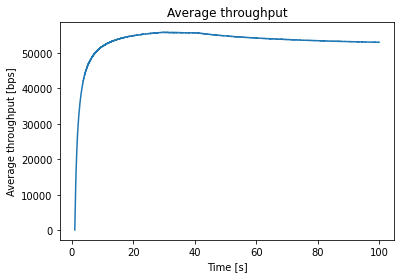

Packet Transfer ratio = 0.2539956383294597


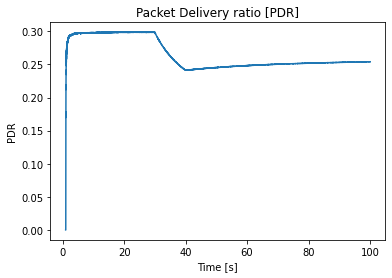

Average End-to-End delay = 0.0013245588950837521


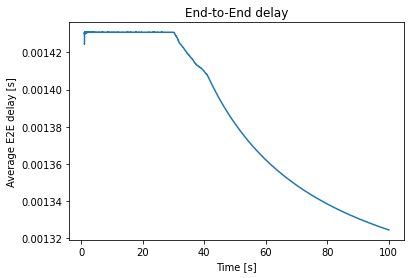

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 1.5
Error rate = 0.000002


Throughput = 52948.73288678114


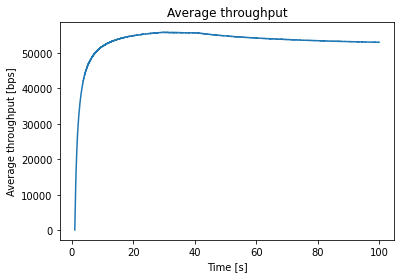

Packet Transfer ratio = 0.2539956383294597


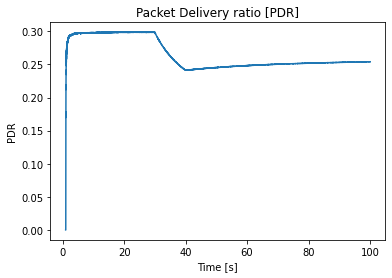

Average End-to-End delay = 0.0013245588950837521


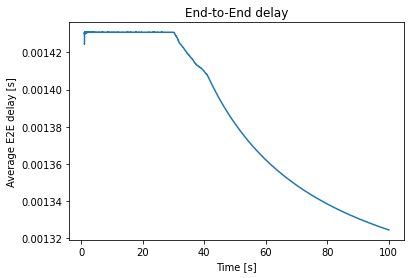

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 1.5
Error rate = 0.000003


Throughput = 52950.51782740147


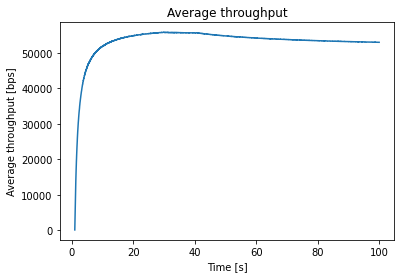

Packet Transfer ratio = 0.2540032763386915


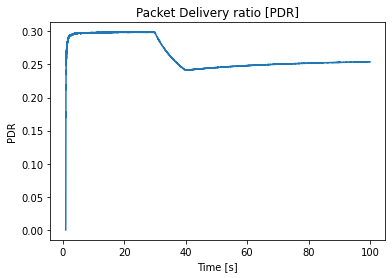

Average End-to-End delay = 0.001324556978291962


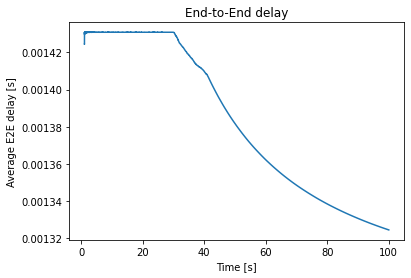

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 1.5
Error rate = 0.000004


Throughput = 52950.51782740147


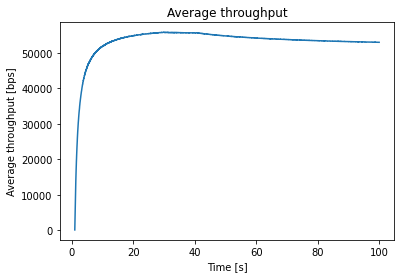

Packet Transfer ratio = 0.2540032763386915


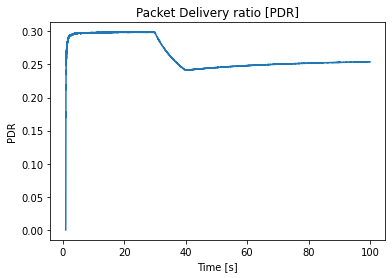

Average End-to-End delay = 0.001324556978291962


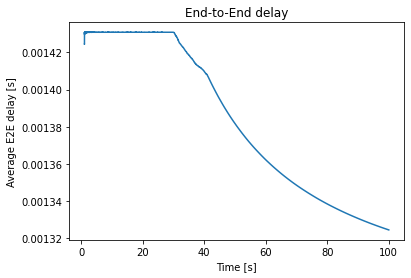

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 1.5
Error rate = 0.000005


Throughput = 52942.970321830144


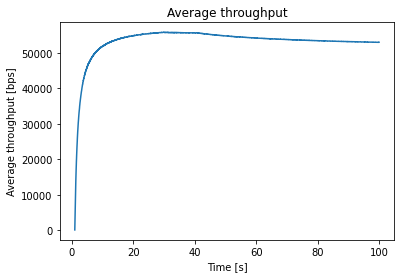

Packet Transfer ratio = 0.25397012296886357


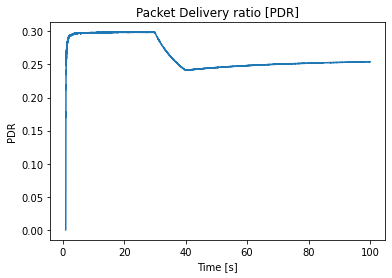

Average End-to-End delay = 0.001324565639754058


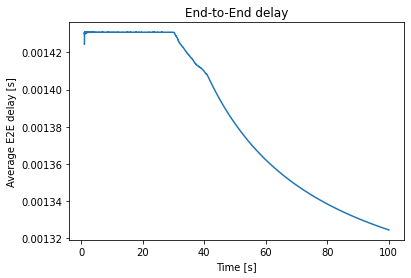

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 1.5
Error rate = 0.000006


Throughput = 52889.35441904036


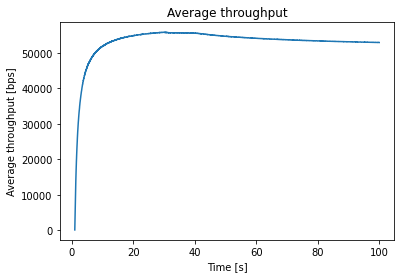

Packet Transfer ratio = 0.253910149750416


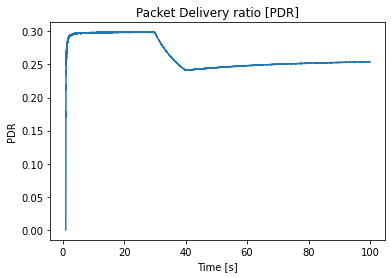

Average End-to-End delay = 0.0013239483310681403


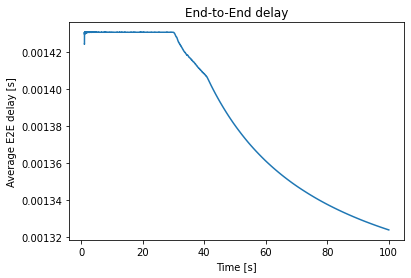

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 1.5
Error rate = 0.000007


Throughput = 52885.34497343173


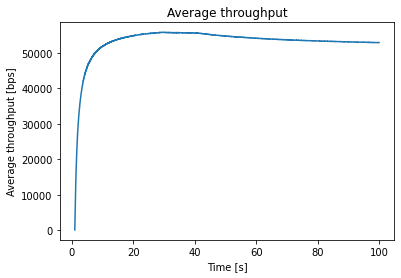

Packet Transfer ratio = 0.25373287180222437


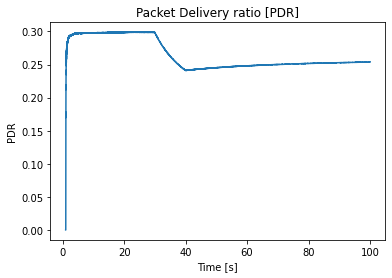

Average End-to-End delay = 0.0013246683841123333


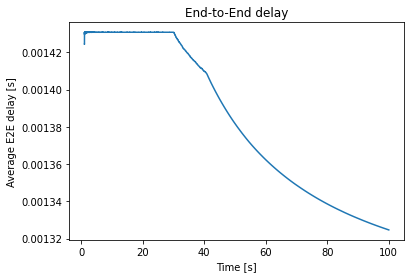

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 1.5
Error rate = 0.000008


Throughput = 52885.34497343173


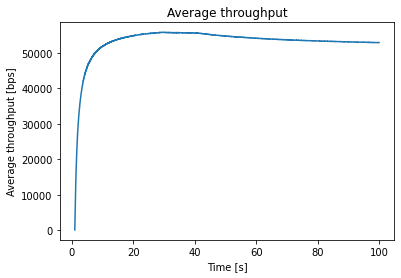

Packet Transfer ratio = 0.25373287180222437


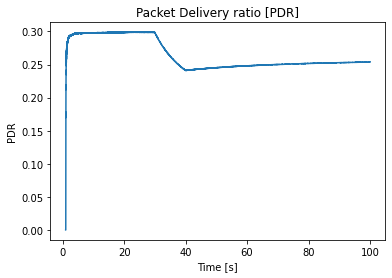

Average End-to-End delay = 0.0013246683841123333


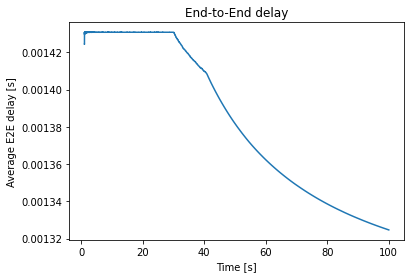

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 1.5
Error rate = 0.000009


Throughput = 52885.34497343173


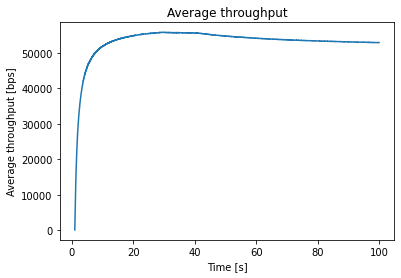

Packet Transfer ratio = 0.25373287180222437


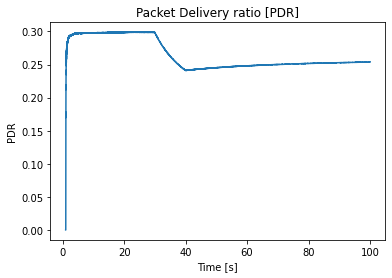

Average End-to-End delay = 0.0013246683841123333


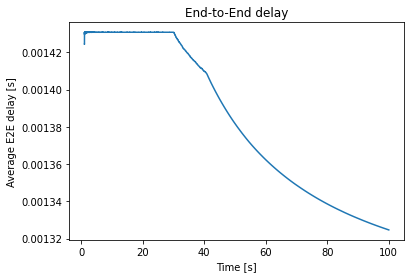

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 1.5
Error rate = 0.00001


Throughput = 52885.34497343173


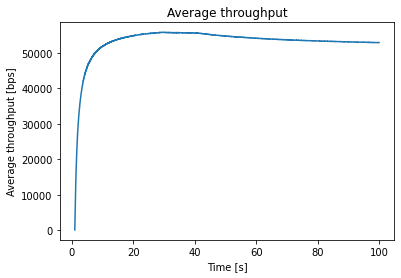

Packet Transfer ratio = 0.25373287180222437


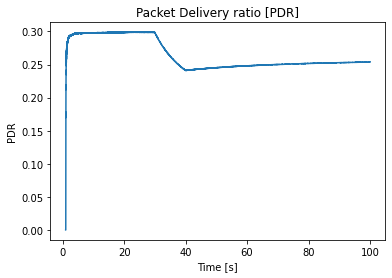

Average End-to-End delay = 0.0013246683841123333


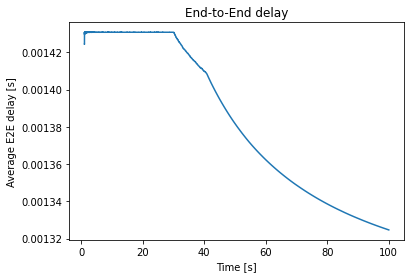

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 55.0
Error rate = 0.000001


Throughput = 52948.73288678114


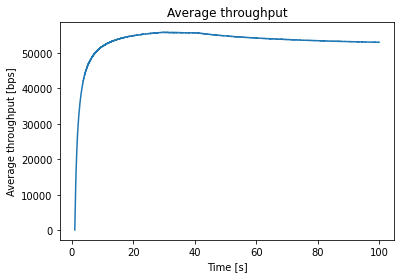

Packet Transfer ratio = 0.2539956383294597


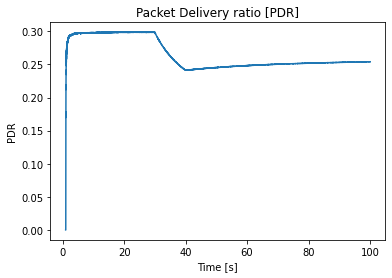

Average End-to-End delay = 0.0013245588950837521


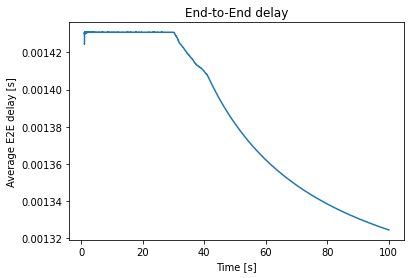

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 55.0
Error rate = 0.000002


Throughput = 52948.73288678114


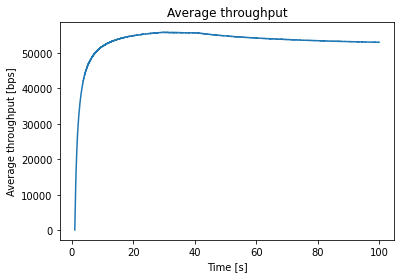

Packet Transfer ratio = 0.2539956383294597


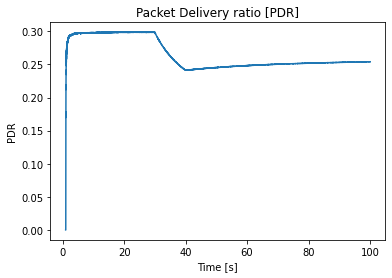

Average End-to-End delay = 0.0013245588950837521


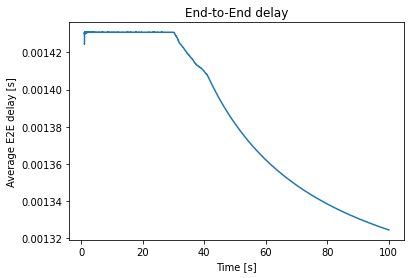

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 55.0
Error rate = 0.000003


Throughput = 52950.51782740147


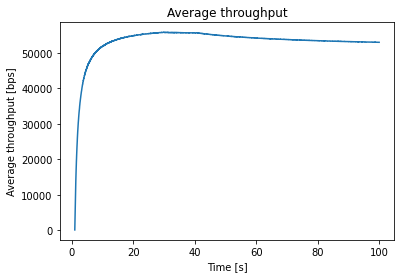

Packet Transfer ratio = 0.2540032763386915


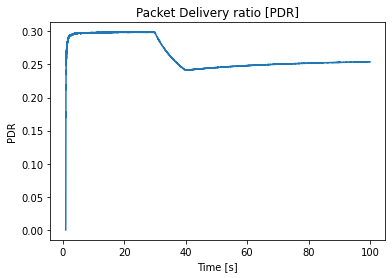

Average End-to-End delay = 0.001324556978291962


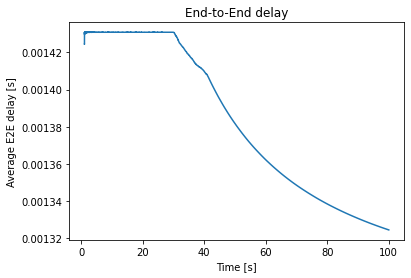

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 55.0
Error rate = 0.000004


Throughput = 52950.51782740147


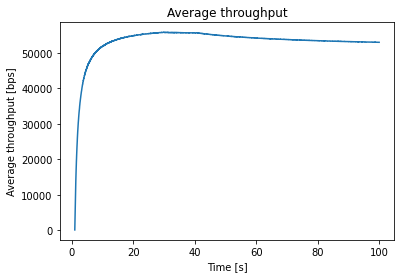

Packet Transfer ratio = 0.2540032763386915


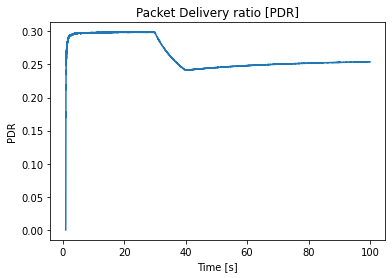

Average End-to-End delay = 0.001324556978291962


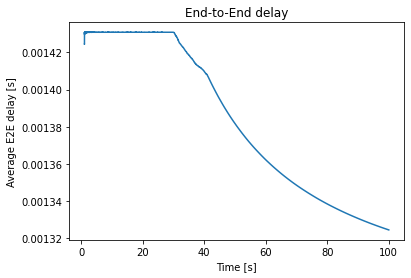

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 55.0
Error rate = 0.000005


Throughput = 52942.970321830144


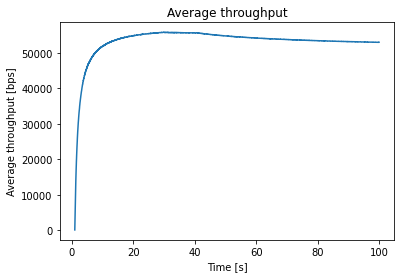

Packet Transfer ratio = 0.25397012296886357


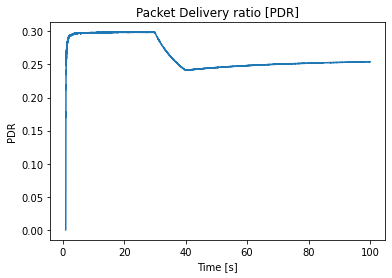

Average End-to-End delay = 0.001324565639754058


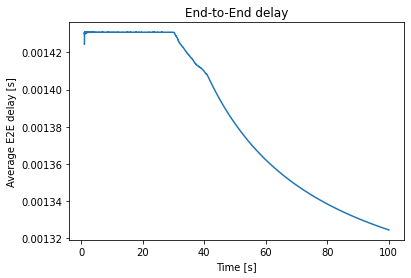

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 55.0
Error rate = 0.000006


Throughput = 52889.35441904036


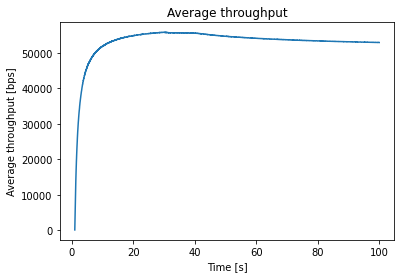

Packet Transfer ratio = 0.253910149750416


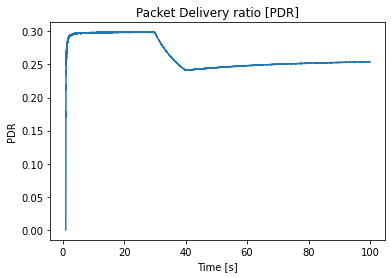

Average End-to-End delay = 0.0013239483310681403


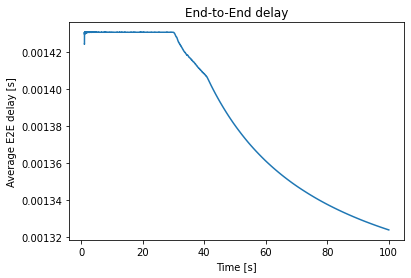

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 55.0
Error rate = 0.000007


Throughput = 52885.34497343173


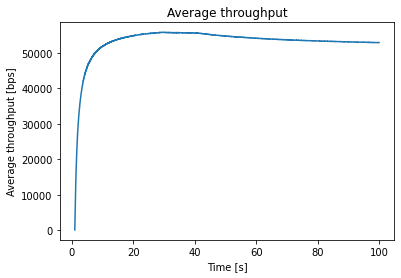

Packet Transfer ratio = 0.25373287180222437


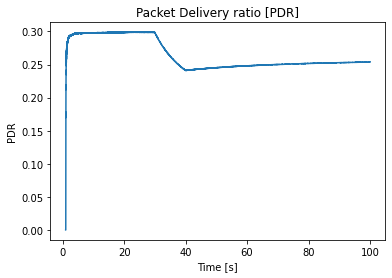

Average End-to-End delay = 0.0013246683841123333


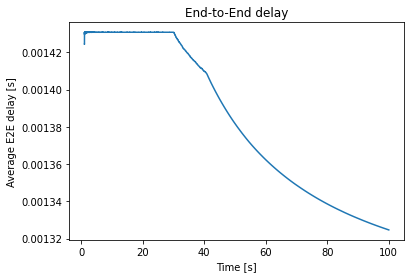

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 55.0
Error rate = 0.000008


Throughput = 52885.34497343173


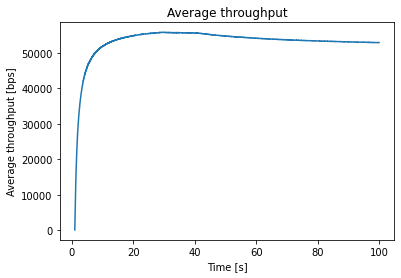

Packet Transfer ratio = 0.25373287180222437


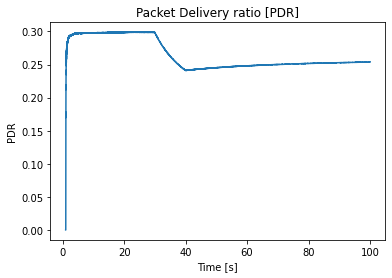

Average End-to-End delay = 0.0013246683841123333


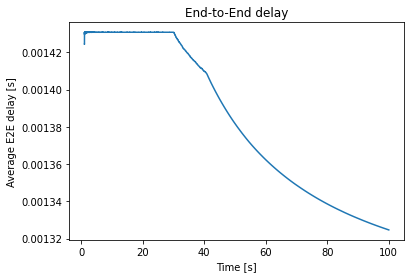

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 55.0
Error rate = 0.000009


Throughput = 52885.34497343173


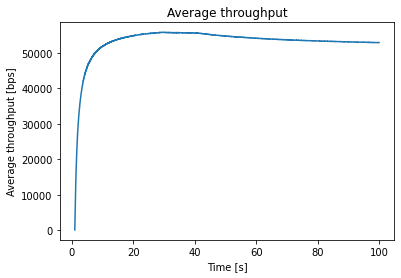

Packet Transfer ratio = 0.25373287180222437


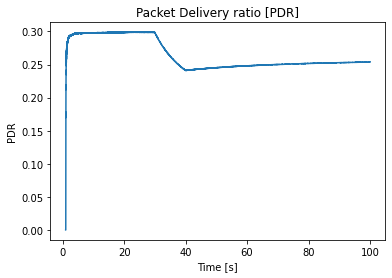

Average End-to-End delay = 0.0013246683841123333


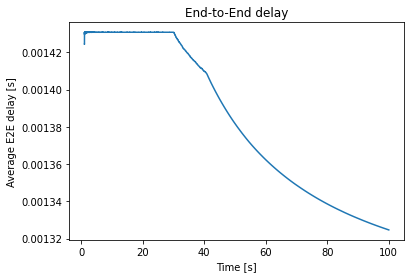

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 55.0
Error rate = 0.00001


Throughput = 52885.34497343173


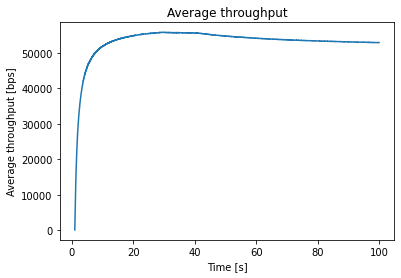

Packet Transfer ratio = 0.25373287180222437


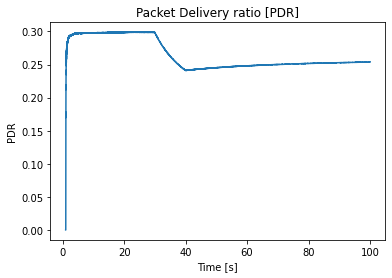

Average End-to-End delay = 0.0013246683841123333


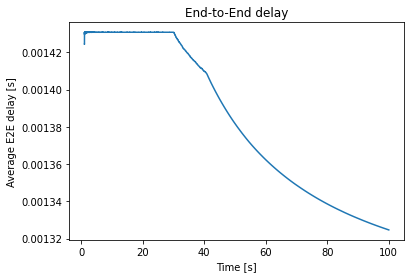

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 155.0
Error rate = 0.000001


Throughput = 52948.73288678114


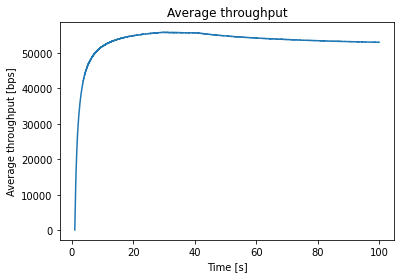

Packet Transfer ratio = 0.2539956383294597


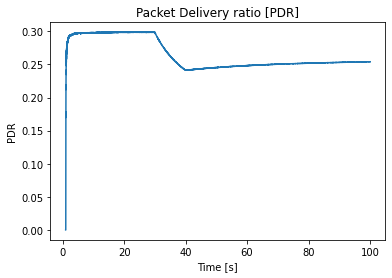

Average End-to-End delay = 0.0013245588950837521


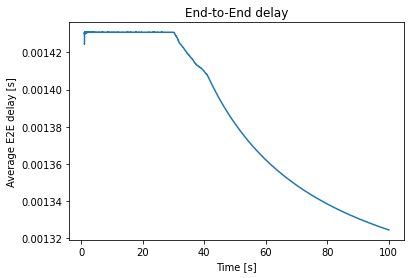

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 155.0
Error rate = 0.000002


Throughput = 52948.73288678114


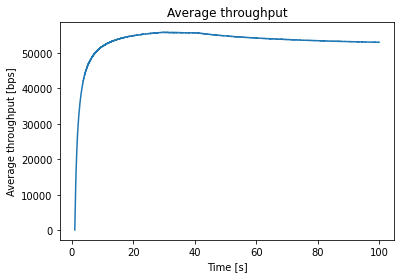

Packet Transfer ratio = 0.2539956383294597


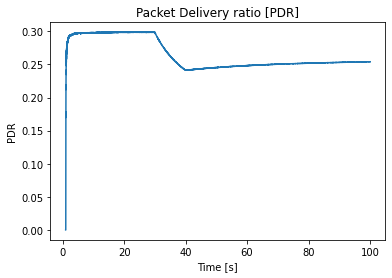

Average End-to-End delay = 0.0013245588950837521


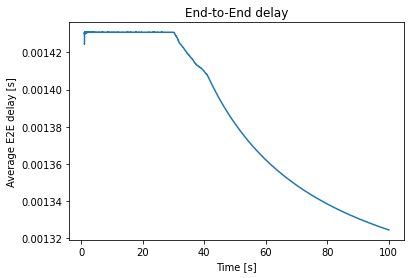

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 155.0
Error rate = 0.000003


Throughput = 52950.51782740147


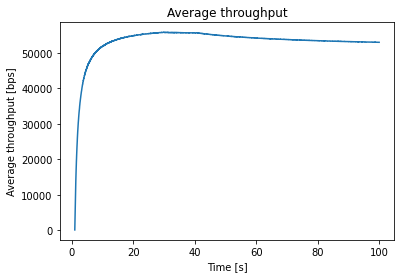

Packet Transfer ratio = 0.2540032763386915


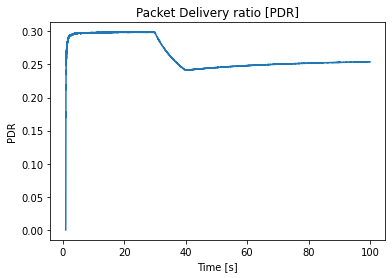

Average End-to-End delay = 0.001324556978291962


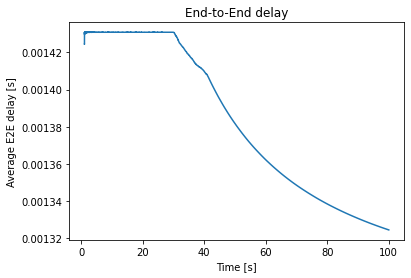

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 155.0
Error rate = 0.000004


Throughput = 52950.51782740147


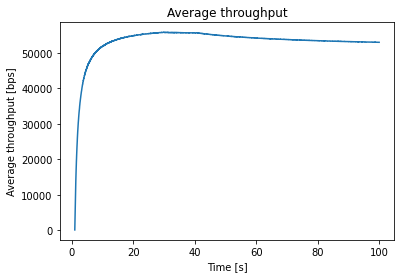

Packet Transfer ratio = 0.2540032763386915


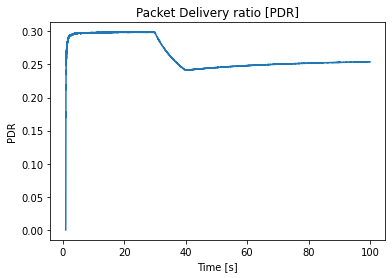

Average End-to-End delay = 0.001324556978291962


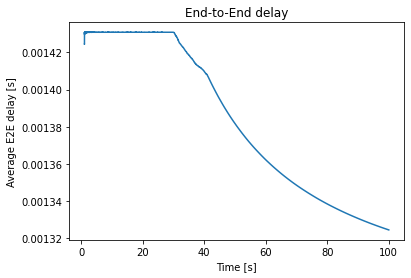

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 155.0
Error rate = 0.000005


Throughput = 52942.970321830144


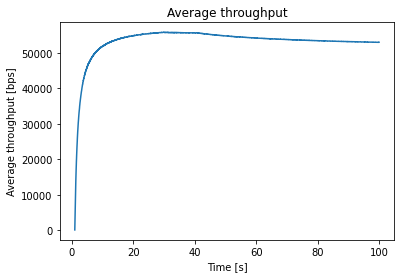

Packet Transfer ratio = 0.25397012296886357


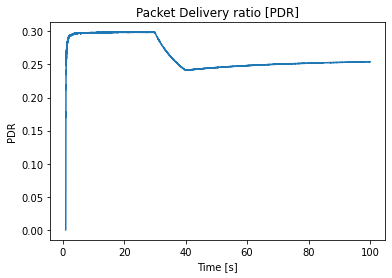

Average End-to-End delay = 0.001324565639754058


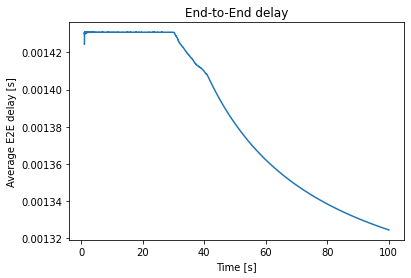

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 155.0
Error rate = 0.000006


Throughput = 52889.35441904036


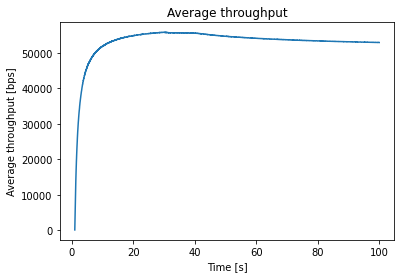

Packet Transfer ratio = 0.253910149750416


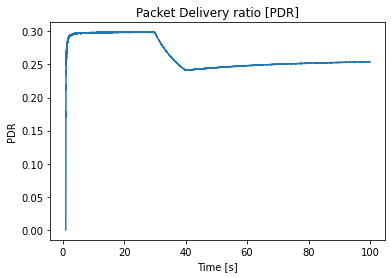

Average End-to-End delay = 0.0013239483310681403


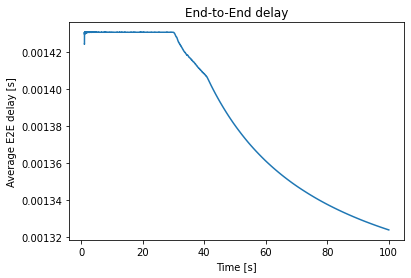

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 155.0
Error rate = 0.000007


Throughput = 52885.34497343173


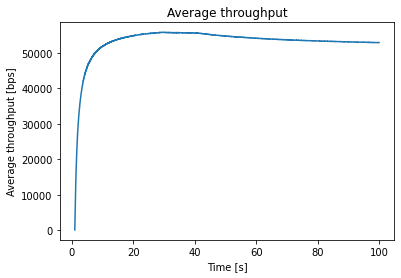

Packet Transfer ratio = 0.25373287180222437


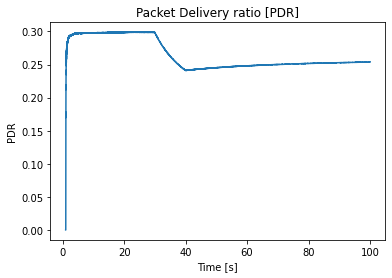

Average End-to-End delay = 0.0013246683841123333


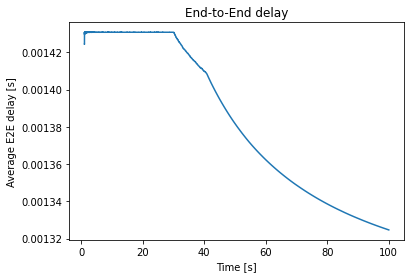

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 155.0
Error rate = 0.000008


Throughput = 52885.34497343173


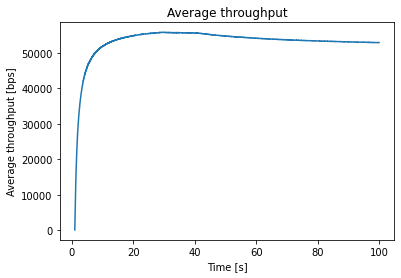

Packet Transfer ratio = 0.25373287180222437


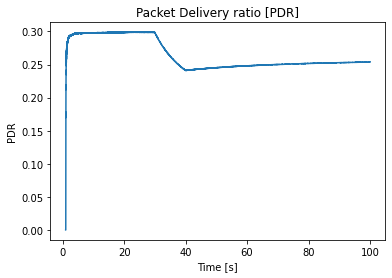

Average End-to-End delay = 0.0013246683841123333


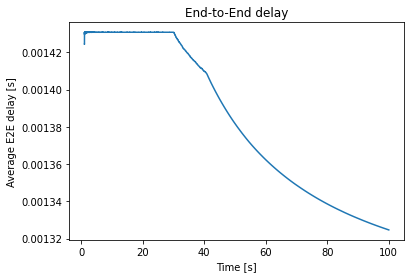

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 155.0
Error rate = 0.000009


Throughput = 52885.34497343173


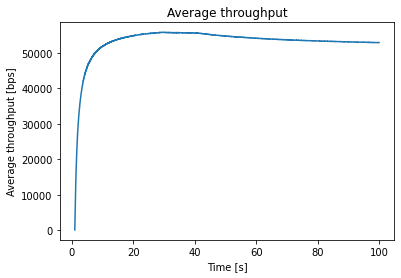

Packet Transfer ratio = 0.25373287180222437


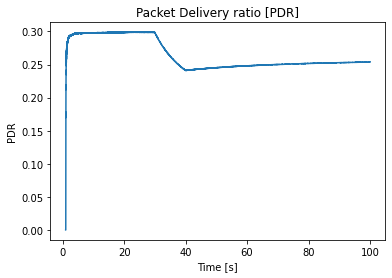

Average End-to-End delay = 0.0013246683841123333


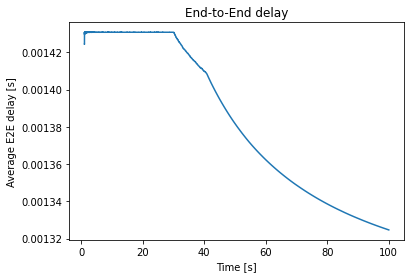

INITIALIZE THE LIST xListHead
SORTING LISTS ...DONE!


num_nodes is set 9
channel.cc:sendUp - Calc highestAntennaZ_ and distCST_
highestAntennaZ_ = 1.5,  distCST_ = 550.0
------------------------------------------------
Bandwidth = 155.0
Error rate = 0.00001


Throughput = 52885.34497343173


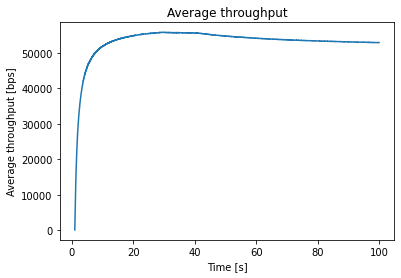

Packet Transfer ratio = 0.25373287180222437


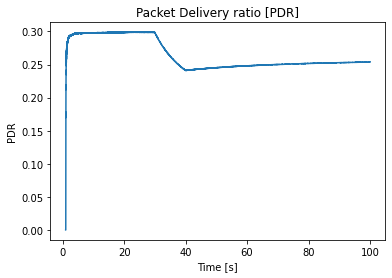

Average End-to-End delay = 0.0013246683841123333


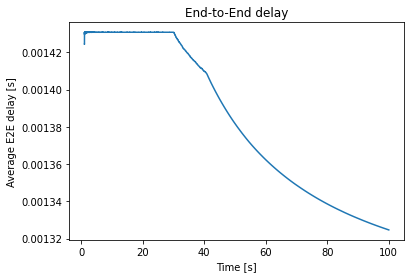

In [5]:
bandwidths = [1.5, 55, 155]
f1 = open("base_topology_1.txt", "r")
base_topology_1 = f1.read()
f2 = open("base_topology_2.txt", "r")
base_topology_2 = f2.read()

def create_tcl(bandwidth, i):
    if i == 10: error_rate = "0.00001"
    else : error_rate = "0.00000" + str(i)
    s = "Mac/Simple set bandwidth_ " + str(bandwidth) + "Mb\n"
    s += base_topology_1
    s += "\n" + "set error_rate " + str(error_rate) + "                   ;#error rate of sending\n"
    s += base_topology_2
    f = open("topo.tcl", "w")
    f.write(s)
    f.close()
    return error_rate
    
def run_tcl():
    os.system('rm out.tr')
    os.system('rm out.nam')
    os.system('ns topo.tcl')
     
for bandwidth in bandwidths:
    for i in range(1,11):
        error_rate = create_tcl(bandwidth, i)
        run_tcl()
        analysis_tr(bandwidth, error_rate)

# create_tcl(1.5, 1)
# run_tcl()
# analysis_tr(1.5, 1)